In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import random

nltk.download('stopwords')
  


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\huawei\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [74]:
# Data Import
data = pd.read_json('reviewSelected100.json', lines=True, 
                    orient='records',encoding = "ISO-8859-1")

# Select business b1 and prepare B1
uniqueBusiness = data['business_id'].unique()
idx = random.randint(0, len(uniqueBusiness)-1)
print('random number for b1: ', idx)
b1 = uniqueBusiness[idx]
print(b1)
B1 = data.loc[data['business_id'] == b1]
B1 = pd.DataFrame(B1, columns = ['text'])
B1.rename(columns={"text": "original_text"}, inplace = True)

random number for b1:  141
oLb3-eXUFtCFJl2DuBhcvA


In [75]:
B1.reset_index(inplace = True)
B1.drop(['index'], axis=1, inplace = True)
B1

,original_text
0,Exceeded my expectations. Rooms were well kept...
1,Stayed for five nights. The staff at this hote...
2,"No need to report a problem at this hotel, the..."
3,I normally stay at a hotel on the strip when I...
4,I have stayed here multiple times for extended...
...,...
95,This hotel is great! It is a bit loud as far a...
96,When I first arrive find the last ada parking ...
97,I live in Vegas - but sometimes I want to enjo...
98,We stay at this hotel often as my husbands con...


In [76]:
# Remove stopwords
for rowIdx in range(len(B1)):
    newString = ''
    s = B1.iloc[rowIdx]['original_text'].lower()
    for idx, word in enumerate(s.split(' ')):
        if word not in stopwords.words('english'):
            if idx == len(s)-1:
                newString = newString + word
            else:
                newString = newString + word + ' '
    
    B1.loc[rowIdx, 'text_without_stopwords'] = newString

In [77]:
B1

,original_text,text_without_stopwords
0,Exceeded my expectations. Rooms were well kept...,exceeded expectations. rooms well kept clean. ...
1,Stayed for five nights. The staff at this hote...,stayed five nights. staff hotel really knows c...
2,"No need to report a problem at this hotel, the...","need report problem hotel, fix it. they'll ch..."
3,I normally stay at a hotel on the strip when I...,"normally stay hotel strip go vegas; however, t..."
4,I have stayed here multiple times for extended...,stayed multiple times extended stays. staff al...
...,...,...
95,This hotel is great! It is a bit loud as far a...,hotel great! bit loud far planes landing clean...
96,When I first arrive find the last ada parking ...,first arrive find last ada parking spot taken ...
97,I live in Vegas - but sometimes I want to enjo...,"live vegas - sometimes want enjoy little ""stay..."
98,We stay at this hotel often as my husbands con...,stay hotel often husbands conferences affiliat...


In [78]:
# stemming
ps = PorterStemmer()
for rowIdx in range(len(B1)):
    newString = ''
    s = B1.iloc[rowIdx]['text_without_stopwords']
    for idx, word in enumerate(s.split(' ')):
        word = ps.stem(word)
        if idx == len(s)-1:
            newString = newString + word
        else:
            newString = newString + word + ' '
    
    B1.loc[rowIdx, 'stemmed_text'] = newString


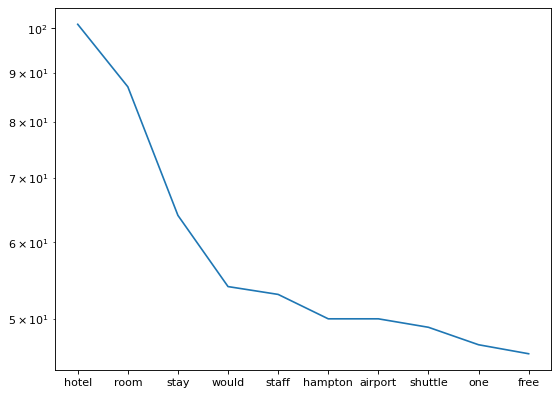

In [87]:
# Word Frequency Before Stemming
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

countsBefore = B1.text_without_stopwords.str.split(expand=True).stack().value_counts()

plt.plot(countsBefore.head(10))
plt.yscale("log")

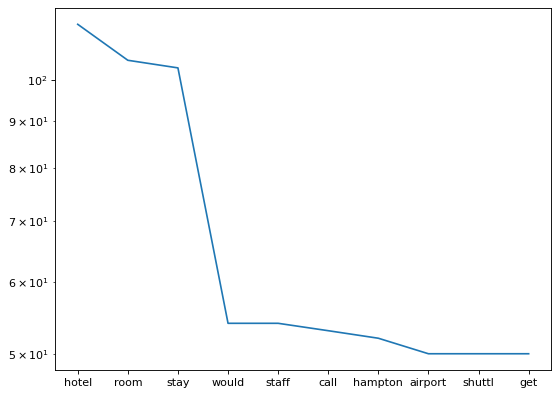

In [88]:
# Word Frequency After Stemming
figure(figsize=(8, 6), dpi=80)

countsAfter = B1.stemmed_text.str.split(expand=True).stack().value_counts()

plt.plot(countsAfter.head(10))
plt.yscale("log")

In [81]:
# Select business b2 and prepare B2
uniqueBusiness = data['business_id'].unique()
idx2 = random.randint(0, len(uniqueBusiness)-1)
print('random num for b2: ', idx2)
b2 = uniqueBusiness[idx2]
print(b2)
B2 = data.loc[data['business_id'] == b2]
B2 = pd.DataFrame(B2, columns = ['text'])
B2.rename(columns={"text": "original_text"}, inplace = True)

random num for b2:  41
Rii85bzYKGC9P0zOyAem6A


In [82]:
B2.reset_index(inplace = True)
B2.drop(['index'], axis=1, inplace = True)
B2

,original_text
0,"While the waitress we had was great, the resta..."
1,Simple chain steakhouse. Not a knock on their ...
2,Very good steaks! Place is always busy but the...
3,Was told 15 to 25 minutes for a table. Was sea...
4,This was an above average restaurant experienc...
...,...
95,I'm impressed. We came here on Easter with a p...
96,Today my husband and I went to this Texas Road...
97,Service is outstanding even when slammed busy ...
98,We went to the Roadhouse to try a different St...


In [83]:
# Remove stopwords
for rowIdx in range(len(B2)):
    newString = ''
    s = B2.iloc[rowIdx]['original_text'].lower()
    for idx, word in enumerate(s.split(' ')):
        if word not in stopwords.words('english'):
            if idx == len(s)-1:
                newString = newString + word
            else:
                newString = newString + word + ' '
    
    B2.loc[rowIdx, 'text_without_stopwords'] = newString

In [84]:
# stemming
ps = PorterStemmer()
for rowIdx in range(len(B2)):
    newString = ''
    s = B2.iloc[rowIdx]['text_without_stopwords']
    for idx, word in enumerate(s.split(' ')):
        word = ps.stem(word)
        if idx == len(s)-1:
            newString = newString + word
        else:
            newString = newString + word + ' '
    
    B2.loc[rowIdx, 'stemmed_text'] = newString


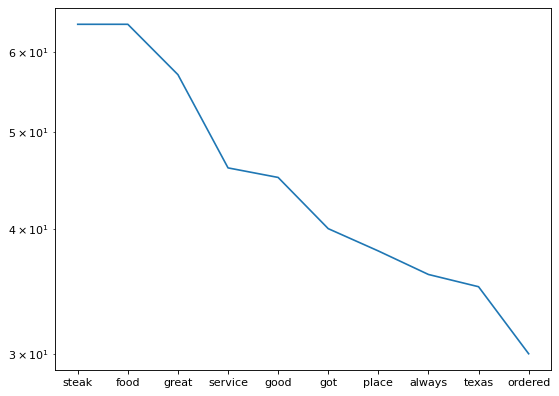

In [89]:
# Word Frequency Before Stemming
countsBefore = B2.text_without_stopwords.str.split(expand=True).stack().value_counts()

figure(figsize=(8, 6), dpi=80)
plt.plot(countsBefore.head(10))
plt.yscale("log")



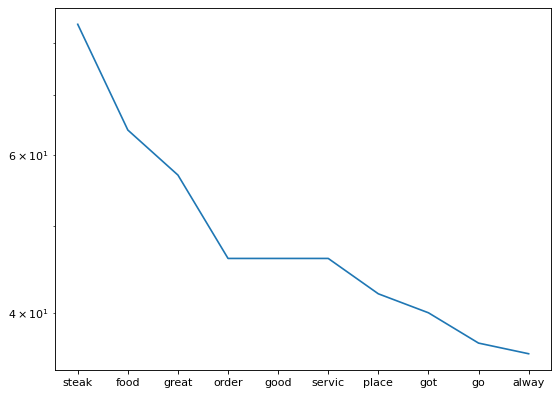

In [90]:
# Word Frequency After Stemming
countsAfter = B2.stemmed_text.str.split(expand=True).stack().value_counts()

figure(figsize=(8, 6), dpi=80)
plt.plot(countsAfter.head(10))
plt.yscale("log")